### This notebook will show anomaly years globally.
    -- Aggregate global emissions per year.

    -- Compute z-score anomalies.

    -- Use IsolationForest to detect anomalies.

    --  Returns a dataframe with flags:

        - is_anomaly_z

        -is_anomaly_iso

In [1]:
import os, sys

project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.append(project_root)

import matplotlib.pyplot as plt

from src.anomaly import run_anomaly_detection
from src.utils import print_section


In [2]:
yearly = run_anomaly_detection()
yearly.head()



Anomaly Detection

Loading Raw CO2 Dataset
Cleaned columns: ['country', 'code', 'calling_code', 'year', 'co2_emission_tons', 'population2022', 'area', '_of_world', 'densitykm2']

Anomalies by z-score:
     year      emission   z_score  is_anomaly_z  iso_label  is_anomaly_iso
257  2007  1.216178e+12  2.525211          True         -1            True
258  2008  1.247767e+12  2.605907          True         -1            True
259  2009  1.277986e+12  2.683102          True         -1            True
260  2010  1.309950e+12  2.764755          True         -1            True
261  2011  1.343652e+12  2.850846          True         -1            True
262  2012  1.377729e+12  2.937898          True         -1            True
263  2013  1.411847e+12  3.025053          True         -1            True
264  2014  1.447122e+12  3.115161          True         -1            True
265  2015  1.479602e+12  3.198134          True         -1            True
266  2016  1.514282e+12  3.286724          True 

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


,year,emission,z_score,is_anomaly_z,iso_label,is_anomaly_iso
0,1750,9350528.0,-0.581513,False,1,False
1,1751,18701056.0,-0.581489,False,1,False
2,1752,28055248.0,-0.581465,False,1,False
3,1753,37409440.0,-0.581441,False,1,False
4,1754,46767296.0,-0.581417,False,1,False


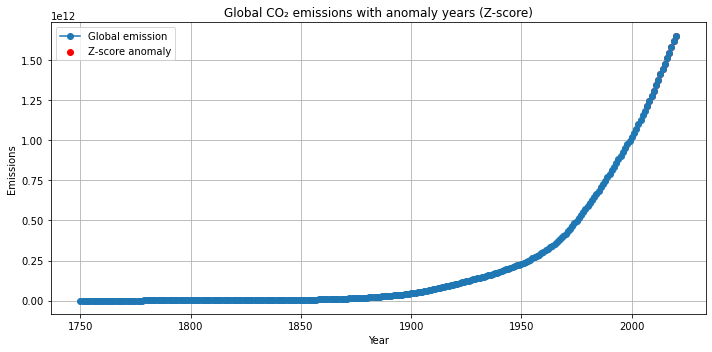

In [3]:
plt.figure(figsize=(10, 5))
plt.plot(yearly["year"], yearly["emission"], marker="o", label="Global emission")

anomalies = yearly[yearly["is_anomaly_z"]]
plt.scatter(anomalies["year"], anomalies["emission"], color="red", label="Z-score anomaly")

plt.title("Global CO₂ emissions with anomaly years (Z-score)")
plt.xlabel("Year")
plt.ylabel("Global CO₂ emissions (tons)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [4]:
anomalies_iso = yearly[yearly["is_anomaly_iso"]][["year", "emission"]]
anomalies_iso


,year,emission
257,2007,1.216178e+12
258,2008,1.247767e+12
259,2009,1.277986e+12
260,2010,1.309950e+12
261,2011,1.343652e+12
262,2012,1.377729e+12
263,2013,1.411847e+12
264,2014,1.447122e+12
265,2015,1.479602e+12
266,2016,1.514282e+12
